## <font color = blue> Load the data </font>

In [1]:
# install stargazer package
install.packages("stargazer", repos="http://cran.us.r-project.org")
library(stargazer)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [2]:
crime = read.csv("crime_v2.csv")
# crime = data.frame(crime)

In [3]:
# see # of rows and columns
dim(crime)

# look at crime data
head(crime)

str(crime)

[1] 97 25

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

## <font color = blue> Stage 1: Draft Report - Due 24 hours before Live Session 12 </font>

* Understand the determinants of crime
* Address the concerns of the political campaign
* Model building
* Regression table with minimum 3 model specifications

### Variable Selection

**Model 1: Explanatory Variables**

General hypothesis on "determinants" of crime (crmrte):
* taxpc -> tax revenue per capita (positively correlated)
> * tax revenue is impacted by many things, such as tax rate, share of businesses/residential, makeup of the tax system (heavy on personal or heavy on businesses)
> * in order to lower the crime rate -> reduce personal tax rate and increase business tax -> make our tax system more progressive
> * more tax more crime is a cause of our regrssive tax policy (need to state assumption and explain)
* prbarr -> probability of arrests (negatively correlated)
> * increase probability of arrests -> direct our policing policy and strict laws for arrests (make our neighborhoods more safe!)
> * more straight forwarad than conviction in understanding "crime" (because you don't always get convicted for crime you committed based on your lawyer, prosecutor leniency)
> * increase more police training and more police (increase our police skills and capabilities)
* density -> density per square mile (positively correlated)
> * want to reduce density -> offer housing credits to low income/middle class
> * reevaluate county zoning rules to better distribute our population (better reflect diversity, social and economic equality)

**Model 2: Adding in Covariates**
* pctymle -> percent young male (positively correlated)
> * though we are not including this as an explanatory variable, we observe that this variable shows high linearity with crime rate, so we need to include this in our model to better capture our effect size of our model 1 determinants
* prbconv -> probaility of conviction (negatively correlated)
> * less conviction, more crime
> * probability of conviction is closely related to probability of arrests, so we added it as a covariate to isolate the effect of probability of arrest
* polpc -> police per capita
> * this is a lagging indicator of crime committed, so we added it as a covariate to isolate the effect of crime rate
> * there are generally more police where there are more crime, so we picked it as a covariate
> * this roughly measures the same thing as crime rate
* prbpris -> probability of prison sentence
> * probability of prison sentence is also closely related to probability of arrests, so we added it as a covariate to isolate the effect of probability of arrest
> * further down in the "crime" chain of events

**Model 3**
* all the wage variables
* mix
* pctmin80
* exclude county, year, west, centrla, urban (because they don't explain crime at all)

### Exploratory Data Analysis

In [4]:
# transform prbconv into numeric
crime$prbconv <- as.numeric(crime$prbconv)

# remove the N/A values
crime <- crime[-c(92:97),]

# confirm the last 6 rows of N/A is removed
dim(crime)

[1] 91 25

In [5]:
# explore crmrte
summary(crime$crmrte)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020927 0.029986 0.033400 0.039642 0.098966 

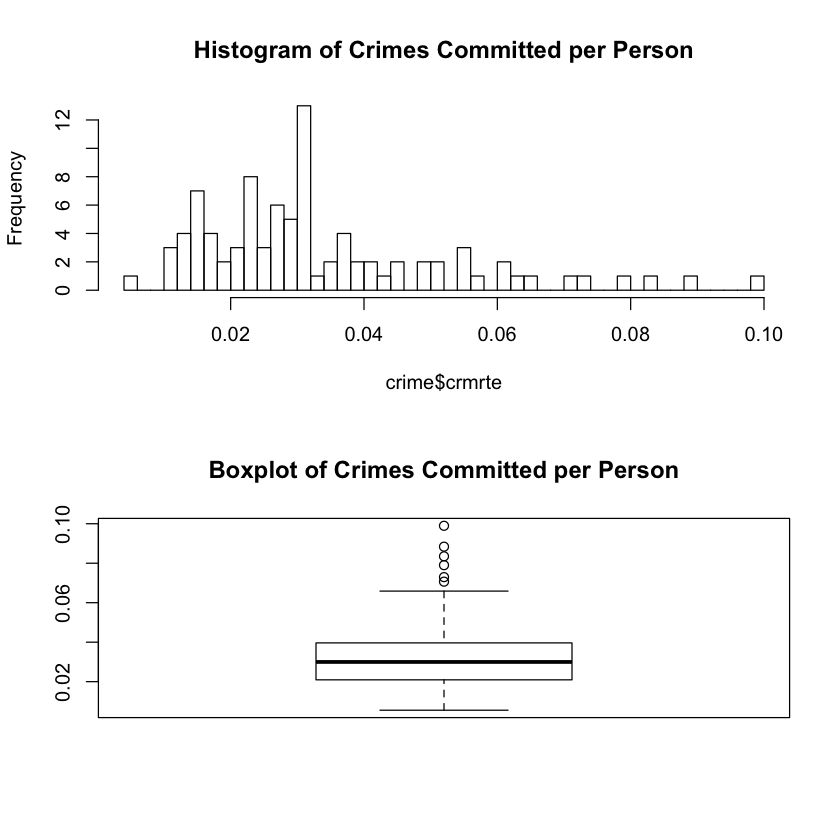

In [6]:
# understand distribution of crmrte 
par("pty", mfrow = c(2,1))

hist(crime$crmrte, main = "Histogram of Crimes Committed per Person", breaks = 50)

boxplot(crime$crmrte, main = "Boxplot of Crimes Committed per Person")

**Plot our hypothesis variables**

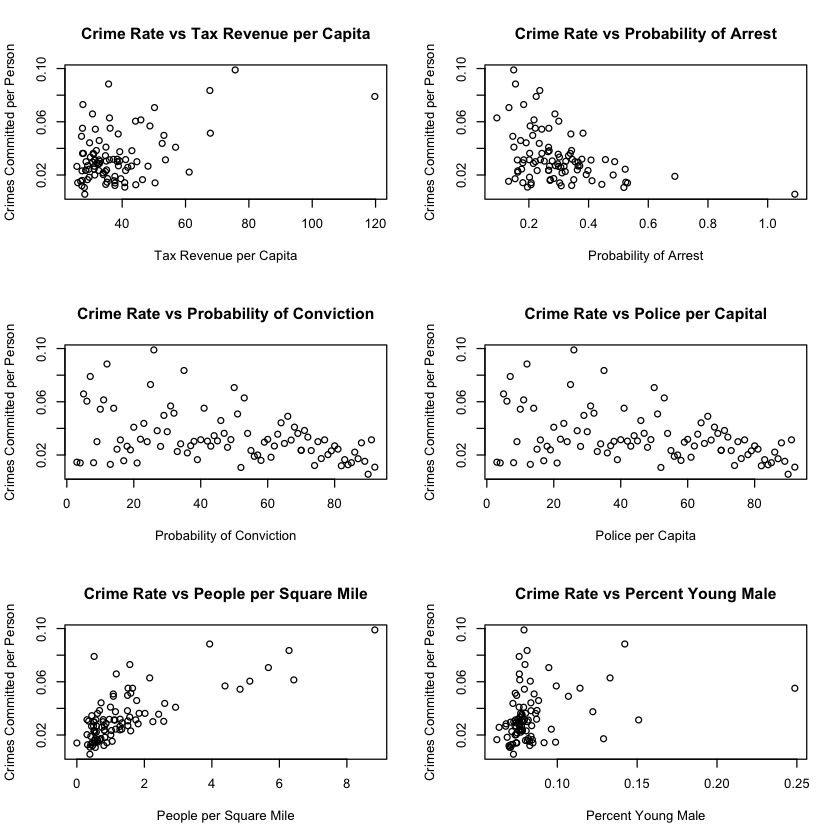

In [7]:
# plot crmrte and hypothesis variables
par(mfrow = c(3,2))

# crime and taxpc
plot(crime$taxpc, crime$crmrte, 
     main = "Crime Rate vs Tax Revenue per Capita",
     xlab = "Tax Revenue per Capita",
     ylab = "Crimes Committed per Person")

# crime and prbarr
plot(crime$prbarr, crime$crmrte, 
     main = "Crime Rate vs Probability of Arrest",
     xlab = "Probability of Arrest",
     ylab = "Crimes Committed per Person")

# crime and prbconv
plot(crime$prbconv, crime$crmrte, 
     main = "Crime Rate vs Probability of Conviction",
     xlab = "Probability of Conviction",
     ylab = "Crimes Committed per Person")

# crime and polc
plot(crime$prbconv, crime$crmrte, 
     main = "Crime Rate vs Police per Capital",
     xlab = "Police per Capita",
     ylab = "Crimes Committed per Person")

# crime and density
plot(crime$density, crime$crmrte, 
     main = "Crime Rate vs People per Square Mile",
     xlab = "People per Square Mile",
     ylab = "Crimes Committed per Person")

# crime and pctymle
plot(crime$pctymle, crime$crmrte, 
     main = "Crime Rate vs Percent Young Male",
     xlab = "Percent Young Male",
     ylab = "Crimes Committed per Person")

**Run correlation test to understand linearities against crmrte**

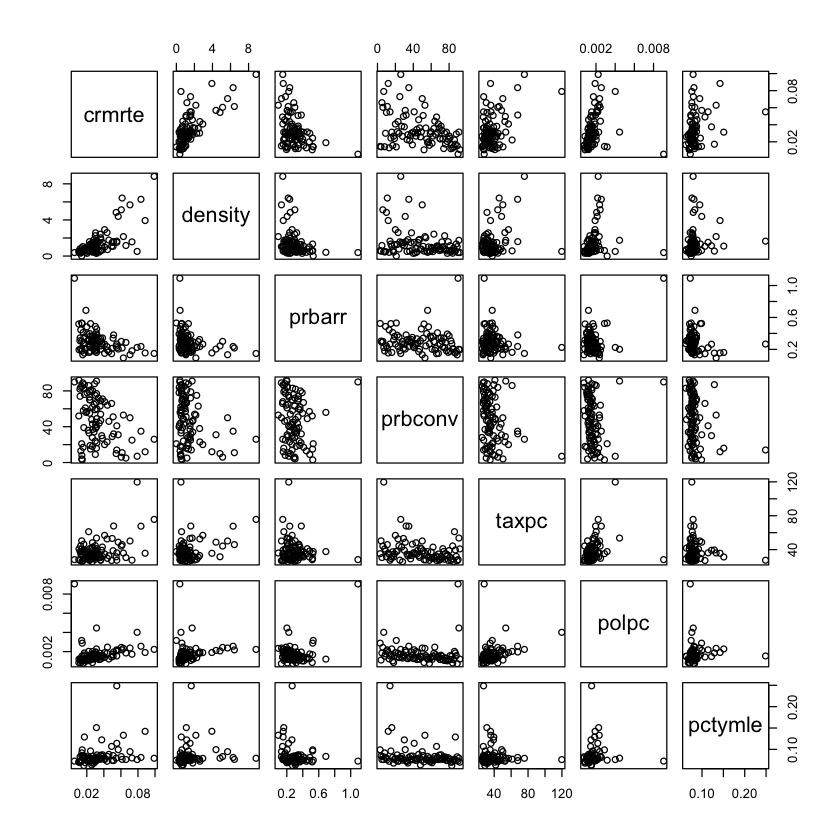

In [8]:
crime_matrix <- crime[, c('crmrte', 'density','prbarr', 'prbconv','taxpc','polpc', 'pctymle')]

plot(crime_matrix)

In [9]:
# crime and taxpc
cor.test(crime$taxpc, crime$crmrte)

# crime and prbarr
cor.test(crime$prbarr, crime$crmrte)

# crime and prbconv
cor.test(crime$prbconv, crime$crmrte)

# crime and polpc
cor.test(crime$polpc, crime$crmrte)

# crime and density
cor.test(crime$density, crime$crmrte)

# crime and pctymle
cor.test(crime$pctymle, crime$crmrte)


	Pearson's product-moment correlation

data:  crime$taxpc and crime$crmrte
t = 4.7668, df = 89, p-value = 7.252e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2701232 0.6010966
sample estimates:
      cor 
0.4509798 



	Pearson's product-moment correlation

data:  crime$prbarr and crime$crmrte
t = -4.036, df = 89, p-value = 0.0001148
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5543684 -0.2039018
sample estimates:
       cor 
-0.3933297 



	Pearson's product-moment correlation

data:  crime$prbconv and crime$crmrte
t = -4.0956, df = 89, p-value = 9.255e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5583790 -0.2094623
sample estimates:
       cor 
-0.3982285 



	Pearson's product-moment correlation

data:  crime$polpc and crime$crmrte
t = 1.6263, df = 89, p-value = 0.1074
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03736736  0.36312508
sample estimates:
      cor 
0.1698849 



	Pearson's product-moment correlation

data:  crime$density and crime$crmrte
t = 10.046, df = 89, p-value = 2.573e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6154070 0.8128743
sample estimates:
      cor 
0.7289632 



	Pearson's product-moment correlation

data:  crime$pctymle and crime$crmrte
t = 2.8721, df = 89, p-value = 0.005096
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.09074673 0.46905867
sample estimates:
      cor 
0.2912485 


**Do log transofrmation on polpc and pctymle to see if linearity improves**

In [10]:
# crime and polpc
cor.test(log(crime$polpc), crime$crmrte)

# crime and pctymle
cor.test(log(crime$pctymle), crime$crmrte)


	Pearson's product-moment correlation

data:  log(crime$polpc) and crime$crmrte
t = 4.0127, df = 89, p-value = 0.0001248
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2017282 0.5527962
sample estimates:
      cor 
0.3914119 



	Pearson's product-moment correlation

data:  log(crime$pctymle) and crime$crmrte
t = 3.2417, df = 89, p-value = 0.001673
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1275652 0.4976139
sample estimates:
      cor 
0.3249726 


## <font color = blue> Model 1 </font>
**One model with only the explanatory variables of key interest (possibly transformed, as determined by your EDA), and no other covariates.**

Explanatory variables selcted:
* prbarr
* density
* taxpc

In [21]:
# install.packages("lmtest")
library(lmtest)
library(sandwich)

In [28]:
# Create Model 1
model1 <- lm(crmrte ~ prbarr + density + taxpc,
             data = crime)

# Use robost standard error in case of heteroskedasticity
se.model1 = coeftest(model1, vcov = vcovHC)[ , "Std. Error"]

# Display Model 1 in regression table
stargazer(model1, type = "text", title = "Model 1 Results",
          ci.levels = .95, align = T, single.row = T,
          se = list(se.model1),
          star.cutoffs = c(0.05, 0.01, 0.001))

# Calculate AIC for model 1
AIC(model1)


Model 1 Results
                         Dependent variable:     
                    -----------------------------
                               crmrte            
-------------------------------------------------
prbarr                    -0.025** (0.008)       
density                   0.007*** (0.001)       
taxpc                      0.0003 (0.0003)       
Constant                    0.017 (0.010)        
-------------------------------------------------
Observations                     91              
R2                              0.613            
Adjusted R2                     0.600            
Residual Std. Error        0.012 (df = 87)       
F Statistic            45.997*** (df = 3; 87)    
Note:               *p<0.05; **p<0.01; ***p<0.001

Model 1 Results
=====
0.950
-----


[1] -542.367

**Check Linear Regression Assumptions**

1. **Data Linearity:** the relationshi between predictor (x) and the outcome (y) is assumed to be linear

2. **Normality of residuals:** the residual errors are assumed to be normally distributed

3. **Homogeneity of residual variance:** the residuals are assumed to have a constant variance

4. **Independence of residentials error terms**

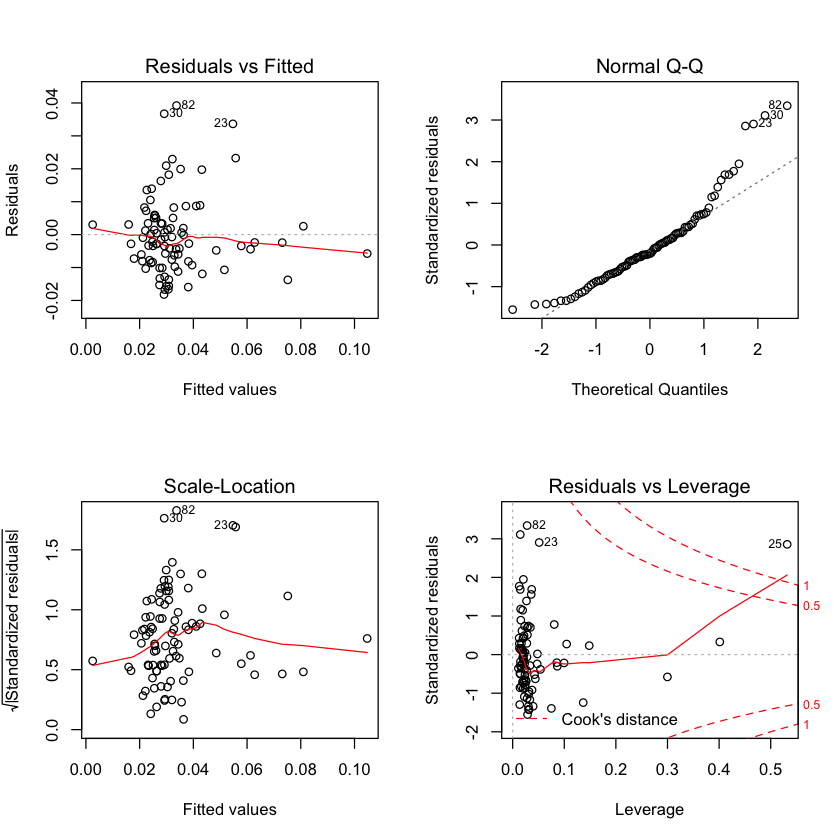

In [27]:
# regression diagnostics plots to check data assumptions
par(mfrow = c(2,2))
plot(model1)

**Model 1 Linear Regression Assumption Interpretations**

1. **Residuals vs Fitted:** this diagnostic plot is used to check the linear relationship assumptions. A horizontal line indicates a linear relationship. Note that for Model 1, our data (indicated by red line) deviates from the horizontal dotted line, which may suggest the presence of a pattern and indicate a problem with aspects of our model. 

2. **Normal Q-Q:** this diagnostic plot is used to examine whether the residuals are normally distributed. A straight dashed line indicates a good normal distribution. Note that for Model 1, our data follows the straight dashed line, which is good...

3. **Scale-Location:** this diagnostic plot is used to check the homogeneity of variance of the residuals. A horizontal line with equally spread points indicate homoscedasticity. Note that for Model 1, this is not the case as the residual points increase and decrease with the value of the fitted outcome variable. This may suggest non-constant variances in the residuals errors. 

4. **Residuals vs Leverage:** this diagnostic plot is used to identify extreme values that might influence regression results when included or excluded from the model. Note that for Model 1, we notice the presence of outliers on the upper and lower right corner which may influence against a regression line in our model.

In [13]:
# prbarr and taxpc
cor.test(crime$taxpc, crime$prbarr)

# density and taxpc
cor.test(crime$taxpc, crime$density)

# density and prbarr
cor.test(crime$prbarr, crime$density)



	Pearson's product-moment correlation

data:  crime$taxpc and crime$prbarr
t = -1.2855, df = 89, p-value = 0.2019
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.33173997  0.07295376
sample estimates:
       cor 
-0.1350197 



	Pearson's product-moment correlation

data:  crime$taxpc and crime$density
t = 3.2106, df = 89, p-value = 0.001844
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1244893 0.4952587
sample estimates:
      cor 
0.3221743 



	Pearson's product-moment correlation

data:  crime$prbarr and crime$density
t = -2.9819, df = 89, p-value = 0.003695
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4776811 -0.1017564
sample estimates:
       cor 
-0.3013853 
